# Protective Mask Maker Portfolio Risk and Returns (Coronavirus)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Protective Mask Maker Stocks
symbols = ['APT','LAKE','MMM','ETSY','HON','GPS','RL','HBI']
start = '2019-12-01'
end = '2020-05-13'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

162

In [7]:
df.head()

,APT,LAKE,MMM,ETSY,HON,GPS,RL,HBI
Date,,,,,,,,
2019-12-02,3.31,10.19,166.759888,43.119999,173.381561,15.386941,105.164062,15.031661
2019-12-03,3.30,10.36,163.687698,42.630001,171.621094,14.921246,103.913742,14.447811
2019-12-04,3.20,10.33,165.640030,42.139999,172.277542,15.253883,107.005074,14.566561
2019-12-05,3.30,10.10,162.894882,41.070000,173.073227,15.491484,110.322823,14.705100
2019-12-06,3.27,10.08,169.931168,41.230000,174.515427,15.462973,109.938873,14.813954


In [8]:
df.tail()

,APT,LAKE,MMM,ETSY,HON,GPS,RL,HBI
Date,,,,,,,,
2020-05-06,13.42,13.36,146.199997,78.239998,133.039993,7.17,71.129997,9.60
2020-05-07,13.50,13.31,145.740005,76.589996,132.789993,7.42,70.230003,9.31
2020-05-08,13.05,13.11,148.509995,80.709999,136.910004,8.10,72.080002,9.47
2020-05-11,12.88,13.41,145.729996,80.279999,134.279999,7.67,69.410004,8.97
2020-05-12,13.84,13.76,141.520004,79.019997,127.589996,7.32,65.529999,8.65


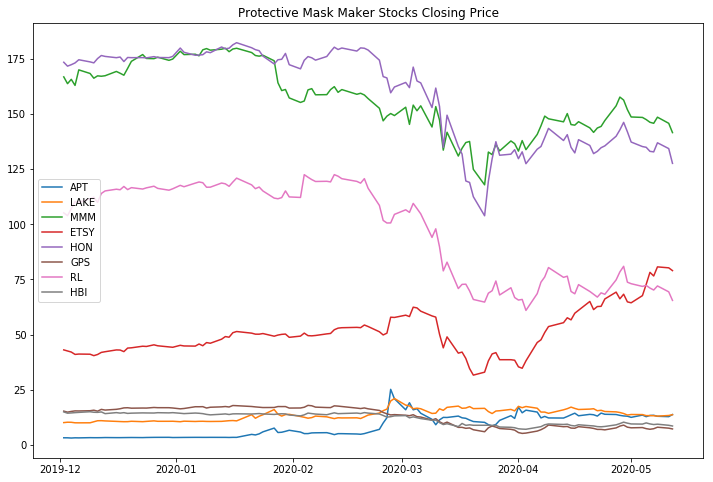

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Protective Mask Maker Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

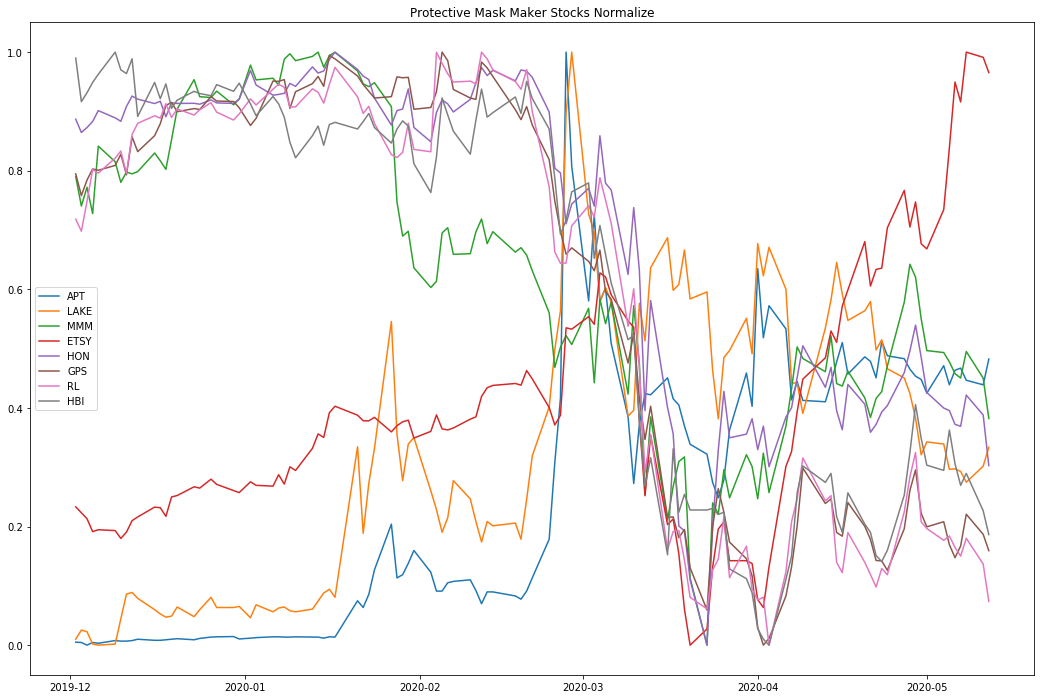

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Protective Mask Maker Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

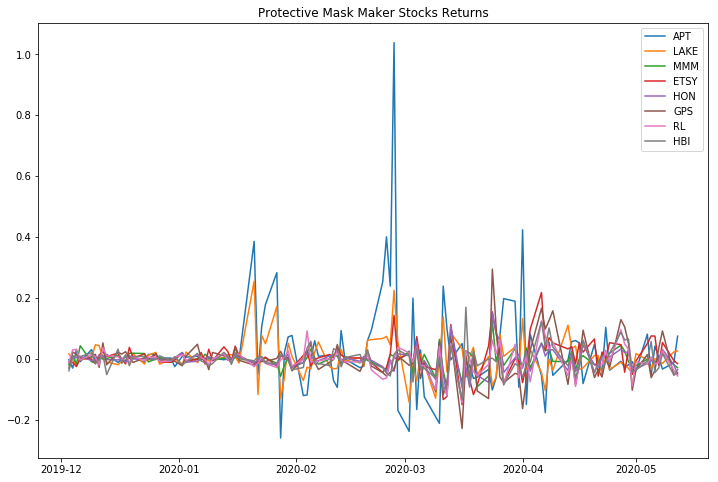

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Protective Mask Maker Stocks Returns')
plt.legend(labels=stock_rets.columns)

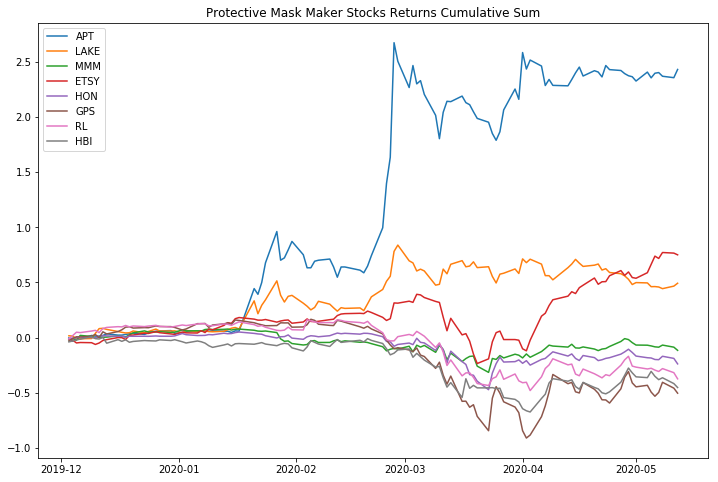

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Protective Mask Maker Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

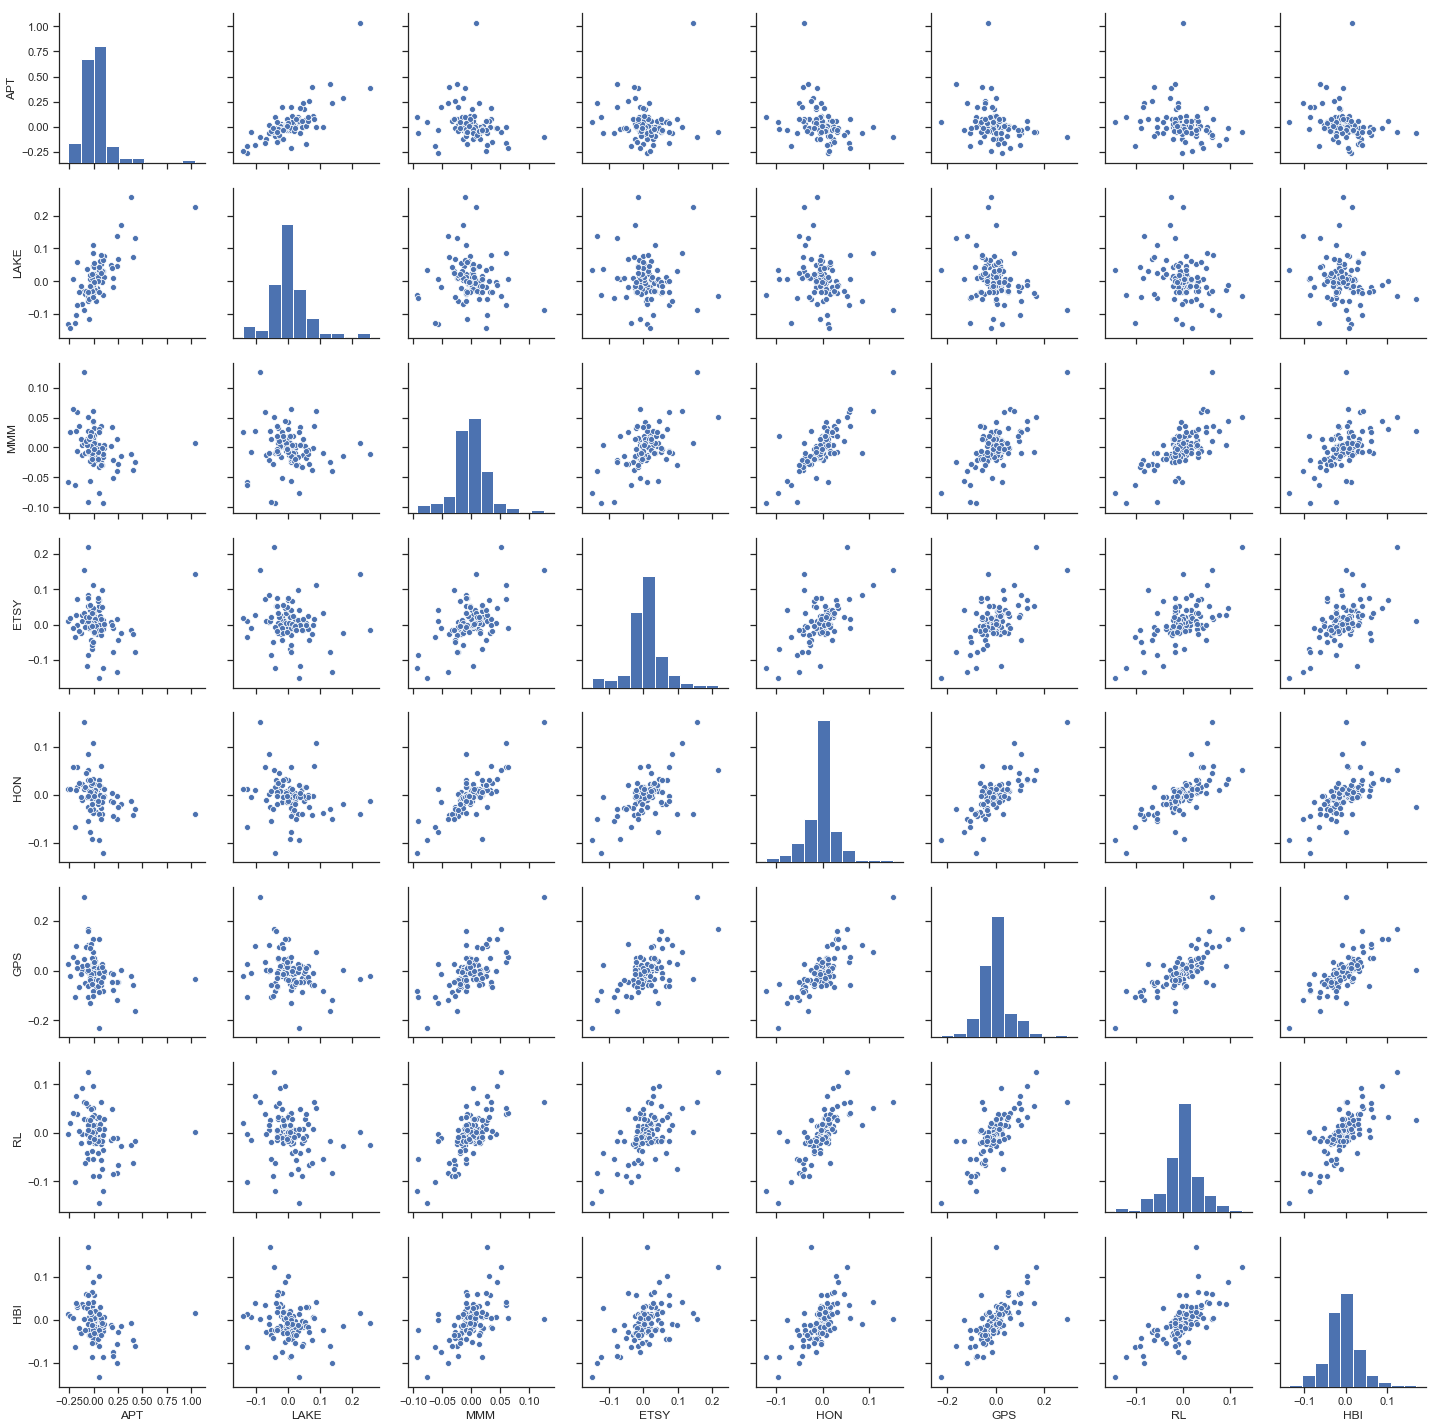

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

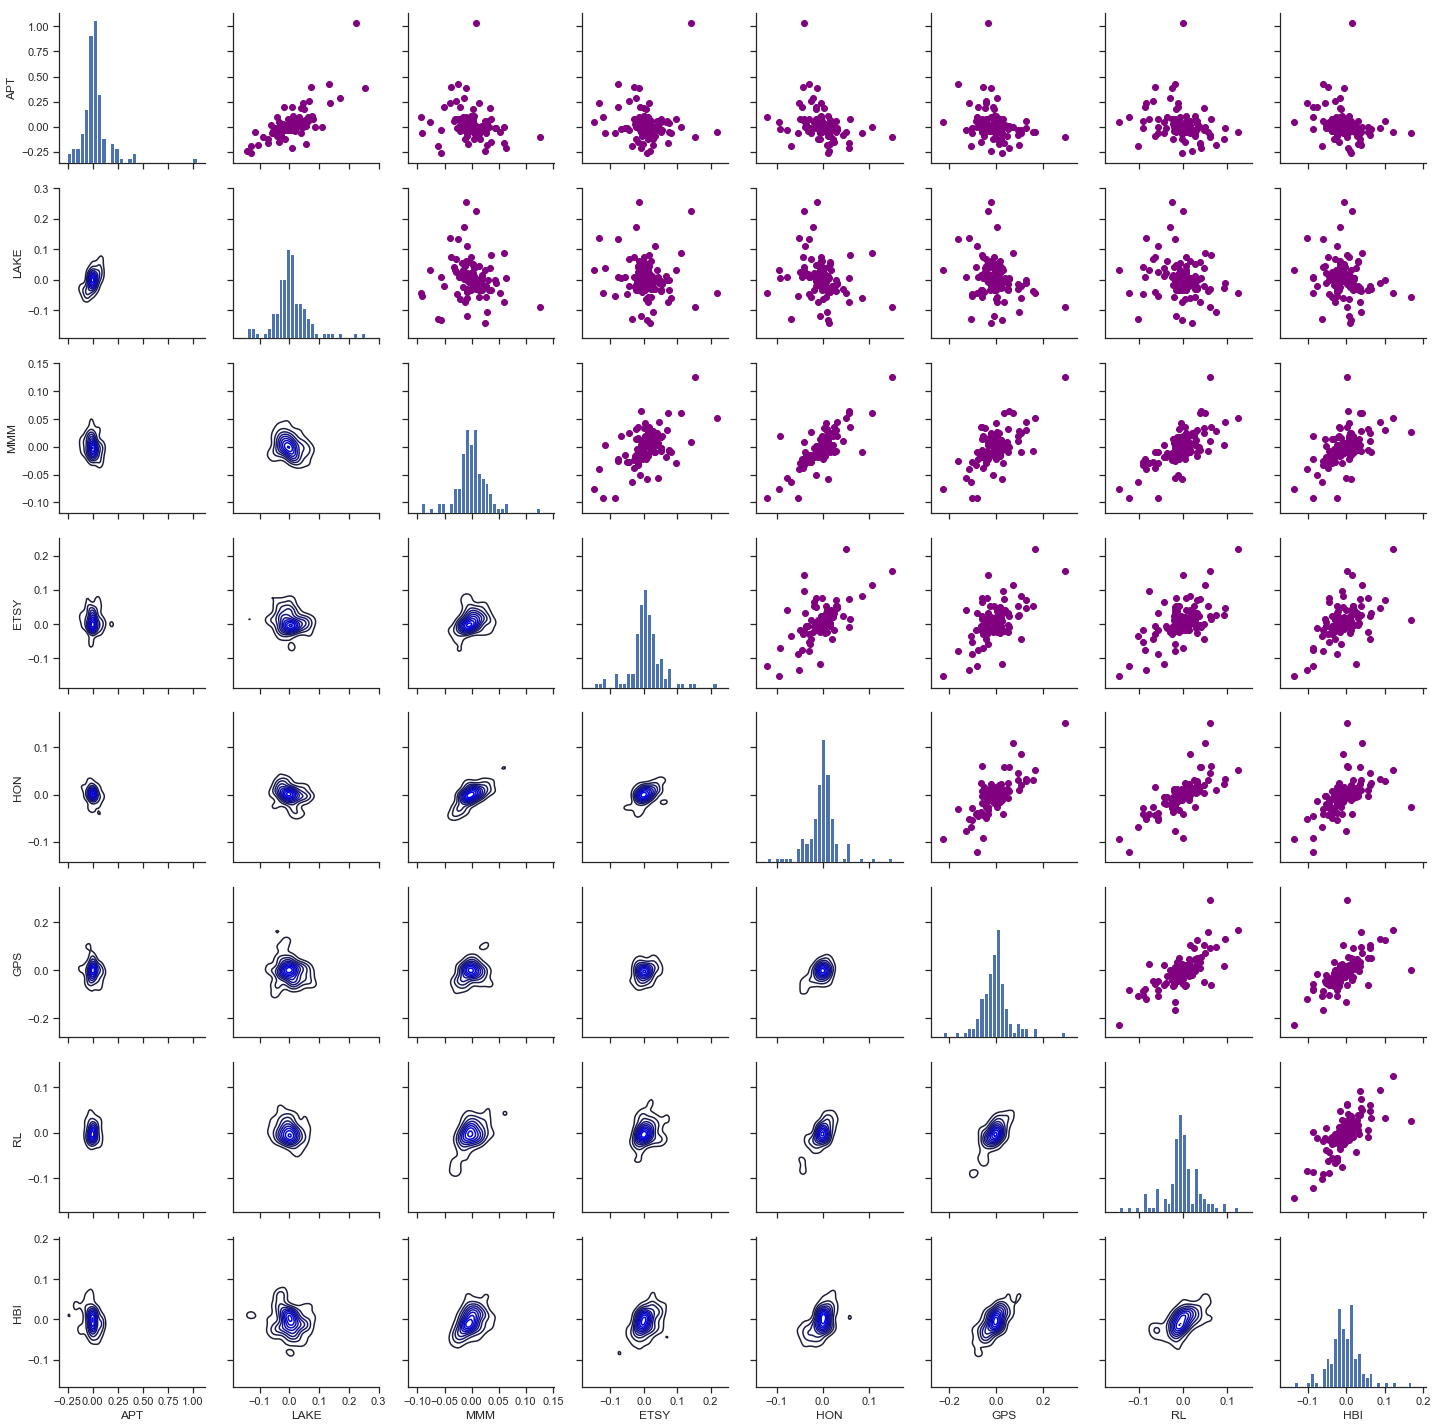

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

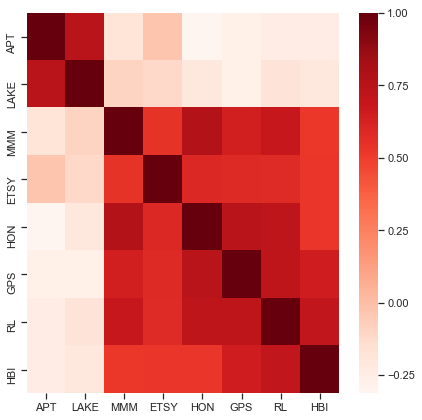

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

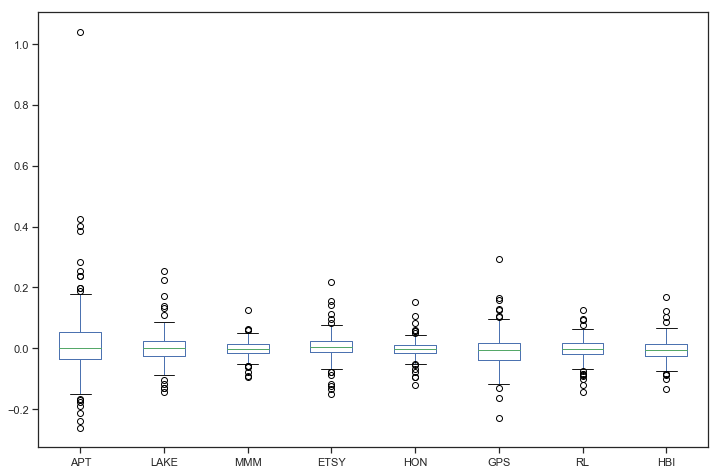

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

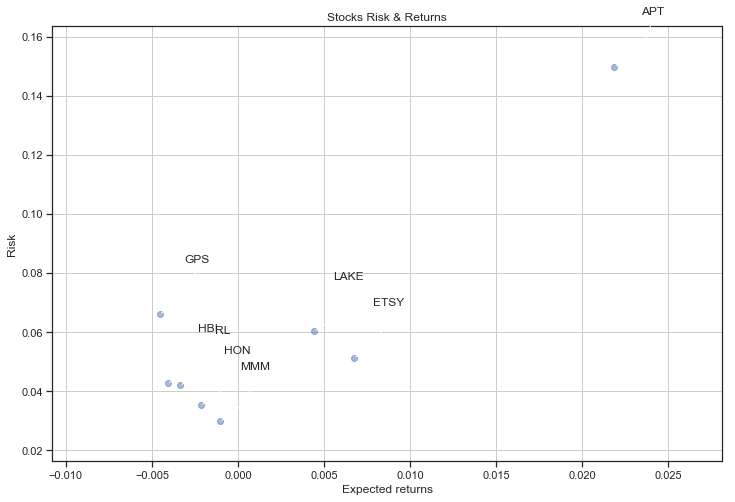

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

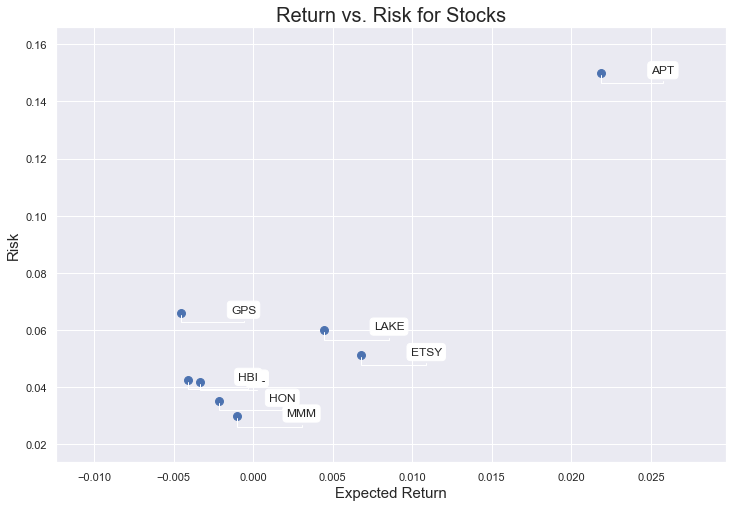

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

HBI   HBI     1.000000
RL    RL      1.000000
LAKE  LAKE    1.000000
MMM   MMM     1.000000
ETSY  ETSY    1.000000
HON   HON     1.000000
GPS   GPS     1.000000
APT   APT     1.000000
MMM   HON     0.770922
HON   MMM     0.770922
APT   LAKE    0.749293
LAKE  APT     0.749293
HON   GPS     0.749202
GPS   HON     0.749202
HON   RL      0.726732
RL    HON     0.726732
GPS   RL      0.725325
RL    GPS     0.725325
HBI   RL      0.715286
RL    HBI     0.715286
      MMM     0.693012
MMM   RL      0.693012
GPS   HBI     0.651394
HBI   GPS     0.651394
GPS   MMM     0.644062
MMM   GPS     0.644062
HON   ETSY    0.595569
ETSY  HON     0.595569
GPS   ETSY    0.589055
ETSY  GPS     0.589055
                ...   
HON   HBI     0.533165
HBI   HON     0.533165
      ETSY    0.529419
ETSY  HBI     0.529419
HBI   MMM     0.525431
MMM   HBI     0.525431
APT   HON     0.313058
HON   APT     0.313058
GPS   LAKE    0.269636
LAKE  GPS     0.269636
GPS   APT     0.268285
APT   GPS     0.268285
      HBI  

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,APT,LAKE,MMM,ETSY,HON,GPS,RL,HBI
Date,,,,,,,,
2019-12-03,0.197830,0.400348,0.339874,0.377203,0.407711,0.378962,0.492354,0.314261
2019-12-04,0.176807,0.351133,0.478611,0.376848,0.459188,0.479441,0.647231,0.469193
2019-12-05,0.224240,0.302445,0.348330,0.339083,0.462110,0.466601,0.651904,0.473445
2019-12-06,0.193153,0.353435,0.621544,0.418669,0.475788,0.433304,0.523632,0.466504
2019-12-09,0.223724,0.363400,0.380368,0.403469,0.424744,0.449747,0.589204,0.508110


In [23]:
Normalized_Value.corr()

,APT,LAKE,MMM,ETSY,HON,GPS,RL,HBI
APT,1.000000,0.749293,-0.182894,-0.027554,-0.313058,-0.268285,-0.241436,-0.246891
LAKE,0.749293,1.000000,-0.092825,-0.114804,-0.202682,-0.269636,-0.178233,-0.204813
MMM,-0.182894,-0.092825,1.000000,0.543935,0.770922,0.644062,0.693012,0.525431
ETSY,-0.027554,-0.114804,0.543935,1.000000,0.595569,0.589055,0.580980,0.529419
HON,-0.313058,-0.202682,0.770922,0.595569,1.000000,0.749202,0.726732,0.533165
GPS,-0.268285,-0.269636,0.644062,0.589055,0.749202,1.000000,0.725325,0.651394
RL,-0.241436,-0.178233,0.693012,0.580980,0.726732,0.725325,1.000000,0.715286
HBI,-0.246891,-0.204813,0.525431,0.529419,0.533165,0.651394,0.715286,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

HBI   HBI     1.000000
RL    RL      1.000000
LAKE  LAKE    1.000000
MMM   MMM     1.000000
ETSY  ETSY    1.000000
HON   HON     1.000000
GPS   GPS     1.000000
APT   APT     1.000000
MMM   HON     0.770922
HON   MMM     0.770922
APT   LAKE    0.749293
LAKE  APT     0.749293
HON   GPS     0.749202
GPS   HON     0.749202
HON   RL      0.726732
RL    HON     0.726732
GPS   RL      0.725325
RL    GPS     0.725325
HBI   RL      0.715286
RL    HBI     0.715286
      MMM     0.693012
MMM   RL      0.693012
GPS   HBI     0.651394
HBI   GPS     0.651394
GPS   MMM     0.644062
MMM   GPS     0.644062
HON   ETSY    0.595569
ETSY  HON     0.595569
GPS   ETSY    0.589055
ETSY  GPS     0.589055
                ...   
HON   HBI     0.533165
HBI   HON     0.533165
      ETSY    0.529419
ETSY  HBI     0.529419
HBI   MMM     0.525431
MMM   HBI     0.525431
APT   HON     0.313058
HON   APT     0.313058
GPS   LAKE    0.269636
LAKE  GPS     0.269636
GPS   APT     0.268285
APT   GPS     0.268285
      HBI  

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
APT     0.021891
LAKE    0.004438
MMM    -0.001039
ETSY    0.006758
HON    -0.002145
GPS    -0.004537
RL     -0.003366
HBI    -0.004074
dtype: float64
--------------------------------------------------
Stock risks:
APT     0.149892
LAKE    0.060156
MMM     0.029736
ETSY    0.051245
HON     0.035252
GPS     0.066058
RL      0.041942
HBI     0.042571
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
GPS,-0.004537,0.066058
HBI,-0.004074,0.042571
RL,-0.003366,0.041942
HON,-0.002145,0.035252
MMM,-0.001039,0.029736
LAKE,0.004438,0.060156
ETSY,0.006758,0.051245
APT,0.021891,0.149892


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
MMM,-0.001039,0.029736
HON,-0.002145,0.035252
RL,-0.003366,0.041942
HBI,-0.004074,0.042571
ETSY,0.006758,0.051245
LAKE,0.004438,0.060156
GPS,-0.004537,0.066058
APT,0.021891,0.149892


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
APT,0.021891,0.149892,0.079332
LAKE,0.004438,0.060156,-0.092455
MMM,-0.001039,0.029736,-0.371252
ETSY,0.006758,0.051245,-0.063269
HON,-0.002145,0.035252,-0.344521
GPS,-0.004537,0.066058,-0.220059
RL,-0.003366,0.041942,-0.318673
HBI,-0.004074,0.042571,-0.330604


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
APT,0.021891,0.149892,0.079332,1.037934,-0.259740,0.000000,7.453416
LAKE,0.004438,0.060156,-0.092455,0.255242,-0.142586,0.001855,2.609995
MMM,-0.001039,0.029736,-0.371252,0.125986,-0.092774,-0.001346,-2.888898
ETSY,0.006758,0.051245,-0.063269,0.217824,-0.150173,0.003010,-1.569509
HON,-0.002145,0.035252,-0.344521,0.150684,-0.120868,-0.000885,-4.982129
GPS,-0.004537,0.066058,-0.220059,0.294586,-0.228492,-0.005577,-4.563232
RL,-0.003366,0.041942,-0.318673,0.124590,-0.144257,-0.002743,-5.589979
HBI,-0.004074,0.042571,-0.330604,0.169451,-0.134298,-0.006285,-3.567454


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
APT,0.021891,0.149892,0.079332,1.037934,-0.259740,0.000000,7.453416,0.000444
LAKE,0.004438,0.060156,-0.092455,0.255242,-0.142586,0.001855,2.609995,0.000159
MMM,-0.001039,0.029736,-0.371252,0.125986,-0.092774,-0.001346,-2.888898,-0.000181
ETSY,0.006758,0.051245,-0.063269,0.217824,-0.150173,0.003010,-1.569509,-0.000098
HON,-0.002145,0.035252,-0.344521,0.150684,-0.120868,-0.000885,-4.982129,-0.000315
GPS,-0.004537,0.066058,-0.220059,0.294586,-0.228492,-0.005577,-4.563232,-0.000288
RL,-0.003366,0.041942,-0.318673,0.124590,-0.144257,-0.002743,-5.589979,-0.000355
HBI,-0.004074,0.042571,-0.330604,0.169451,-0.134298,-0.006285,-3.567454,-0.000224


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
APT,0.021891,0.149892,0.079332,1.037934,-0.259740,0.000000,7.453416,0.000444,8.257192
LAKE,0.004438,0.060156,-0.092455,0.255242,-0.142586,0.001855,2.609995,0.000159,0.595561
MMM,-0.001039,0.029736,-0.371252,0.125986,-0.092774,-0.001346,-2.888898,-0.000181,-0.225307
ETSY,0.006758,0.051245,-0.063269,0.217824,-0.150173,0.003010,-1.569509,-0.000098,1.565676
HON,-0.002145,0.035252,-0.344521,0.150684,-0.120868,-0.000885,-4.982129,-0.000315,-0.379386
GPS,-0.004537,0.066058,-0.220059,0.294586,-0.228492,-0.005577,-4.563232,-0.000288,-0.685143
RL,-0.003366,0.041942,-0.318673,0.124590,-0.144257,-0.002743,-5.589979,-0.000355,-0.520877
HBI,-0.004074,0.042571,-0.330604,0.169451,-0.134298,-0.006285,-3.567454,-0.000224,-0.576668


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
RL,-0.003366,0.041942,-0.318673,0.124590,-0.144257,-0.002743,-5.589979,-0.000355,-0.520877
HON,-0.002145,0.035252,-0.344521,0.150684,-0.120868,-0.000885,-4.982129,-0.000315,-0.379386
GPS,-0.004537,0.066058,-0.220059,0.294586,-0.228492,-0.005577,-4.563232,-0.000288,-0.685143
HBI,-0.004074,0.042571,-0.330604,0.169451,-0.134298,-0.006285,-3.567454,-0.000224,-0.576668
MMM,-0.001039,0.029736,-0.371252,0.125986,-0.092774,-0.001346,-2.888898,-0.000181,-0.225307
ETSY,0.006758,0.051245,-0.063269,0.217824,-0.150173,0.003010,-1.569509,-0.000098,1.565676
LAKE,0.004438,0.060156,-0.092455,0.255242,-0.142586,0.001855,2.609995,0.000159,0.595561
APT,0.021891,0.149892,0.079332,1.037934,-0.259740,0.000000,7.453416,0.000444,8.257192
